## Rebinning Tests

### Ryan's idea

In [40]:
# Setup the old and new wavelength arrays
v_old = 3.0   # velocity of old scale
n_old = 100  # number of data points
v_new = 7.6  # velocity of new scale

# Generate fake data (wavelength array to start at 5000A)
f_old = np.random.normal(1.0,0.1,n_old)
w_old = 5000.0*(1.0+v_old/299792.458)**np.arange(n_old)

In [41]:
# Generate new wavelength array
n_new = 1+np.int(np.log10((w_old[-1]/w_old[0]))/np.log10((1.0+v_new/299792.458)))
w_new = 5000.0*(1.0+v_new/299792.458)**np.arange(n_new)

# Create a spline representation of the old wavelength array, k=1 forces linear interpolation
spl = InterpolatedUnivariateSpline(w_old, f_old, k=1)

In [42]:
# linearly interpolate onto new flux array
f_new = spl(w_new)

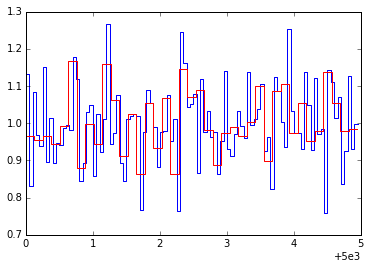

In [43]:
plt.plot(w_old,f_old,'b-',drawstyle='steps')
plt.plot(w_new,f_new,'r-',drawstyle='steps')
plt.show()

In [48]:
# Check flux conserving
gd_old = np.where( (w_old > 5001.) & (w_old < 5004.) )[0]
gd_new = np.where( (w_new > 5001.) & (w_new < 5004.) )[0]
sum_old = np.sum( f_old[gd_old] )
sum_new = np.sum( f_old[gd_new] * v_new/v_old )
print('The sums are old={:g}, new={:g}'.format(sum_old, sum_new))

The sums are old=60.1306, new=60.0575


### Idea with cumsum

In [104]:
# Endpoints of original pixels
npix = len(w_old)
#wvl = (w_old + np.roll(w_old, 1))/2.
wvh = (w_old + np.roll(w_old, -1))/2.
#wvl[0] = w_old[0] - (w_old[1] - w_old[0])/2.
wvh[npix-1] = w_old[npix-1] + (w_old[npix-1] - w_old[npix-2])/2.

In [55]:
# Cumulative Sum
cumsum = np.cumsum(f_old)

In [74]:
# Interpolate
fcum = interp1d(wvh, cumsum, fill_value=0., bounds_error=False)

In [71]:
# Endpoints of new pixels
nnew = len(w_new)
#wvl = (w_old + np.roll(w_old, 1))/2.
nwvh = (w_new + np.roll(w_new, -1))/2.
nwvh[nnew-1] = w_new[nnew-1] + (w_new[nnew-1] - w_new[nnew-2])/2.
#
allnwv = np.zeros(nnew+1)
allnwv[0] = w_new[0] - (w_new[1] - w_new[0])/2.
allnwv[1:] = nwvh

In [105]:
# Evaluate
newcum = fcum(allnwv)
if (allnwv[-1] > wvh[-1]):
    newcum[-1] = cumsum[-1]

In [88]:
print(wvh[20])
print(cumsum[20])
print(fcum(wvh[20]))

5001.02580974
20.7619849296
20.7619849296


In [89]:
print(fcum(wvh[20]))
print(fcum(wvh[21]))
print(fcum((wvh[20]+wvh[21])/2.))

20.7619849296
21.6198423593
21.1909136444


In [92]:
newcum[0]

0.0

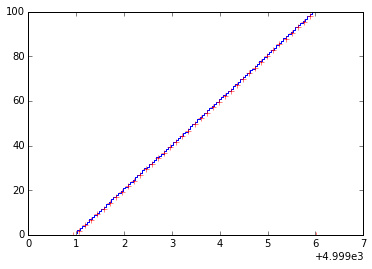

In [103]:
# Cumulative Plot
plt.clf()
plt.plot(wvh,cumsum,'b-', drawstyle='steps')
plt.plot(allnwv,newcum,'r+')
plt.show()
# This looks goofy but I think is correct

In [108]:
# Rebinned flux
new_fx = (np.roll(newcum,-1)-newcum)[:-1]
#new_fx

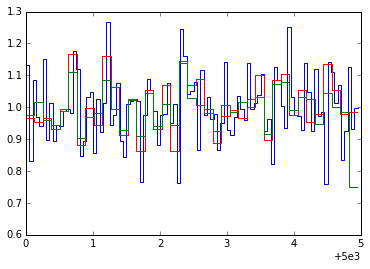

In [109]:
# Plot
plt.plot(w_old,f_old,'b-',drawstyle='steps')
plt.plot(w_new,f_new,'r-',drawstyle='steps')
plt.plot(w_new,new_fx*v_old/v_new,'g-',drawstyle='steps')
plt.show()

In [110]:
np.arange(3000.,9000,5)

array([ 3000.,  3005.,  3010., ...,  8985.,  8990.,  8995.])

In [111]:
dwv = allnwv - np.roll(allnwv,1)
dwv

array([-5.07261715,  0.12675436,  0.12675596,  0.12675918,  0.12676239,
        0.1267656 ,  0.12676882,  0.12677203,  0.12677524,  0.12677846,
        0.12678167,  0.12678489,  0.1267881 ,  0.12679131,  0.12679453,
        0.12679774,  0.12680096,  0.12680417,  0.12680739,  0.1268106 ,
        0.12681382,  0.12681703,  0.12682025,  0.12682346,  0.12682668,
        0.12682989,  0.12683311,  0.12683632,  0.12683954,  0.12684275,
        0.12684597,  0.12684918,  0.1268524 ,  0.12685562,  0.12685883,
        0.12686205,  0.12686526,  0.12686848,  0.1268717 ,  0.12687491,
        0.12687652])